## Deteksi warna pada citra

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
img = cv2.imread('popy.jpg')

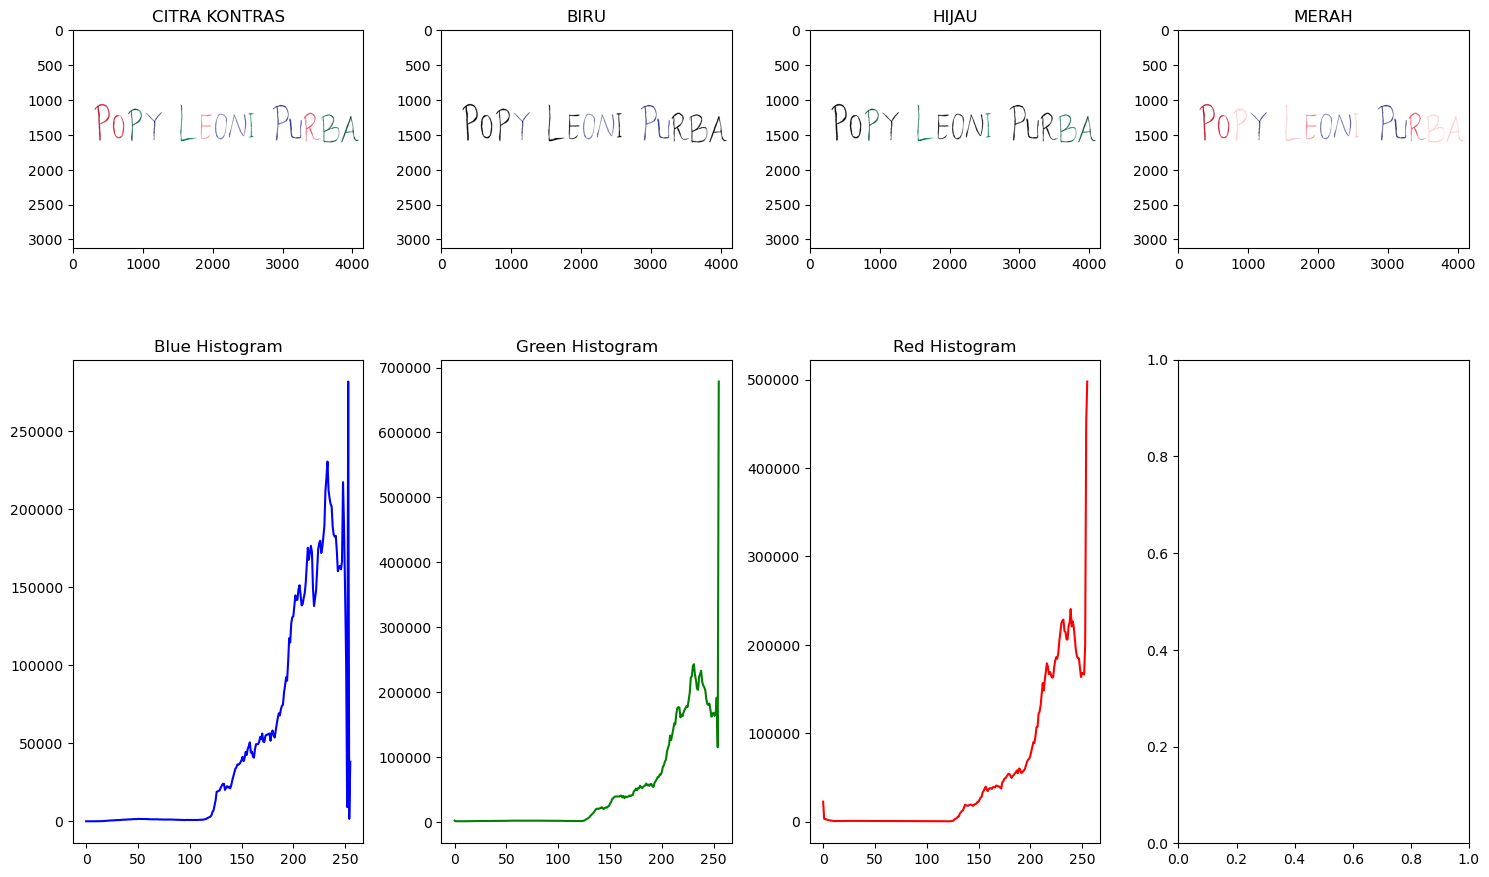

In [86]:
# Membaca gambar
img = cv2.imread('popy.jpg')
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Menentukan rentang nilai HSV untuk warna biru, merah, dan hijau
lower_blue = np.array([90, 50, 50])
upper_blue = np.array([140, 255, 255])
# Rentang Hue: dari 90 hingga 140. Ini menunjukkan bahwa warna biru dalam gambar memiliki nilai Hue antara 90 dan 140 di dalam ruang warna HSV.
# Rentang Saturation: dari 50 hingga 255. Ini menunjukkan bahwa warna biru dalam gambar memiliki nilai Saturation antara 50 dan 255 di dalam ruang warna HSV.
# Rentang Value: dari 50 hingga 255. Ini menunjukkan bahwa warna biru dalam gambar memiliki nilai Value antara 50 dan 255 di dalam ruang warna HSV.

# Merah dapat berada di dua rentang, jadi kita gabungkan kedua mask
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([70, 255, 255])
lower_red2 = np.array([90,50, 50]) # Rentang kedua untuk warna merah pada Hue yang melampaui 180
upper_red2 = np.array([1140, 255, 255])

lower_green = np.array([10, 70, 5])  # Menurunkan nilai Hue agar lebih mendekati hijau
upper_green = np.array([90, 255, 255])

# Membuat mask untuk setiap rentang warna
mask_blue = cv2.inRange(hsv_img, lower_blue, upper_blue)
mask_red = cv2.inRange(hsv_img, lower_red1, upper_red1) | cv2.inRange(hsv_img, lower_red2, upper_red2)
mask_green = cv2.inRange(hsv_img, lower_green, upper_green)

# Menerapkan mask pada gambar asli untuk mendeteksi area berwarna
blue_detected = cv2.bitwise_and(img, img, mask=mask_blue)
red_detected = cv2.bitwise_and(img, img, mask=mask_red)
green_detected = cv2.bitwise_and(img, img, mask=mask_green)

# Mengubah latar belakang yang terdeteksi menjadi putih
background_white = np.full_like(img, (255, 255, 255), dtype=np.uint8)
background_white[mask_blue != 0] = [0, 0, 0]
background_white[mask_red != 0] = [0, 0, 0]
background_white[mask_green != 0] = [0, 0, 0]

# Menggabungkan hasil deteksi warna dengan latar belakang putih
blue_detected_with_white_bg = cv2.bitwise_or(blue_detected, background_white)
red_detected_with_white_bg = cv2.bitwise_or(red_detected, background_white)
green_detected_with_white_bg = cv2.bitwise_or(green_detected, background_white)

# Membuat gambar asli dengan hanya menampilkan warna hijau, merah, dan biru
img_with_selected_colors = cv2.bitwise_or(blue_detected_with_white_bg, 
                                           cv2.bitwise_or(red_detected_with_white_bg, green_detected_with_white_bg))

# Ubah warna merah menjadi putih keabu-abuan
red_mask = cv2.inRange(red_detected_with_white_bg, (0, 0, 0), (0, 0, 0))
red_detected_with_white_bg[red_mask != 0] = [200, 200, 255]

# Membuat subplot dan menampilkan gambar
fig, axes = plt.subplots(2, 4, figsize=(15, 10))

# Tampilkan gambar dengan warna terpilih
axes[0, 0].imshow(cv2.cvtColor(img_with_selected_colors, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('CITRA KONTRAS')

axes[0, 1].imshow(cv2.cvtColor(blue_detected_with_white_bg, cv2.COLOR_BGR2RGB))
axes[0, 1].set_title('BIRU')

axes[0, 2].imshow(cv2.cvtColor(green_detected_with_white_bg, cv2.COLOR_BGR2RGB))
axes[0, 2].set_title('HIJAU')

axes[0, 3].imshow(cv2.cvtColor(red_detected_with_white_bg, cv2.COLOR_BGR2RGB))
axes[0, 3].set_title('MERAH')

# Plot histogram untuk setiap gambar
for i, color in enumerate(['Blue', 'Green', 'Red']):
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    axes[1, i].plot(hist, color=color)
    axes[1, i].set_title('{} Histogram'.format(color))

# Tampilkan plot
plt.tight_layout()
plt.show()

# Tutup semua jendela OpenCV
cv2.destroyAllWindows()

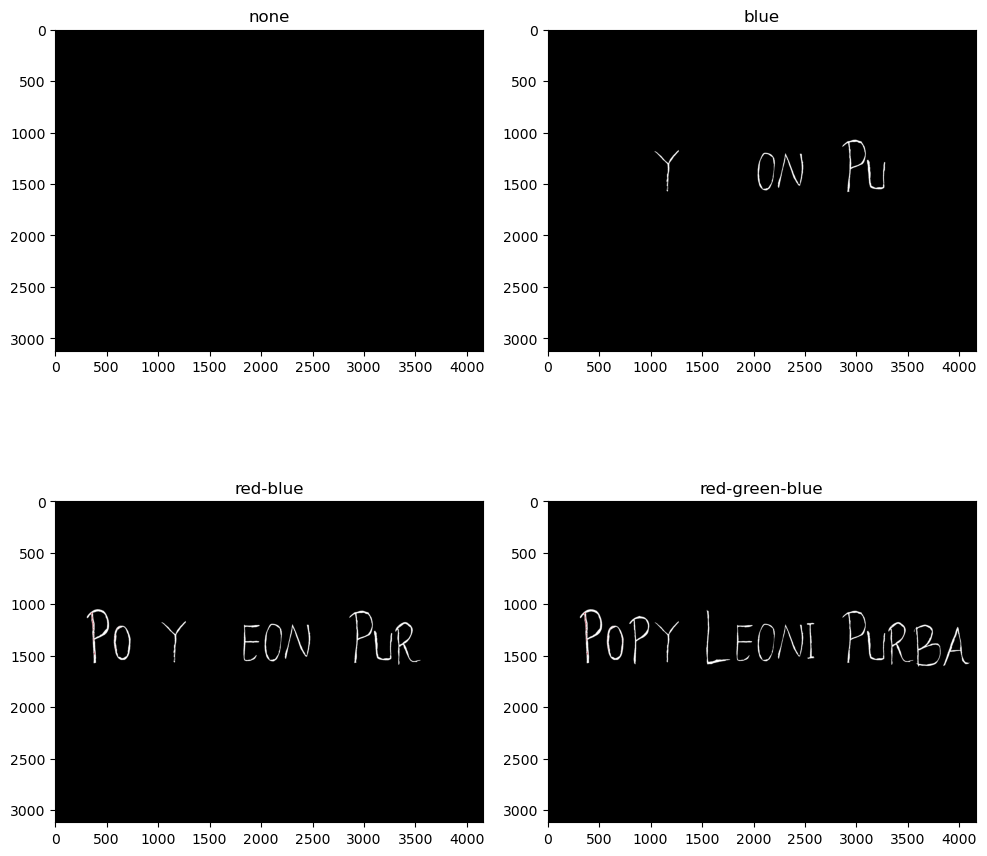

In [39]:
# Membaca gambar
img = cv2.imread('popy.jpg')
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Menentukan rentang nilai HSV untuk warna biru, merah, dan hijau
lower_blue = np.array([110, 50, 50])
upper_blue = np.array([140, 255, 255])

# Merah dapat berada di dua rentang, jadi kita gabungkan kedua mask
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([110, 50, 50])
upper_red2 = np.array([1140, 255, 255])

lower_green = np.array([0, 80, 5])  # Menurunkan nilai Hue agar lebih mendekati hijau
upper_green = np.array([1140, 255, 255])

# Membuat mask untuk setiap rentang warna
mask_blue = cv2.inRange(hsv_img, lower_blue, upper_blue)
mask_red = cv2.inRange(hsv_img, lower_red1, upper_red1) | cv2.inRange(hsv_img, lower_red2, upper_red2)
mask_green = cv2.inRange(hsv_img, lower_green, upper_green)

# Menerapkan mask pada gambar asli untuk mendeteksi area berwarna
blue_detected = cv2.bitwise_and(img, img, mask=mask_blue)
red_detected = cv2.bitwise_and(img, img, mask=mask_red)
green_detected = cv2.bitwise_and(img, img, mask=mask_green)

# Mengubah warna yang terdeteksi menjadi putih
blue_detected[np.where((blue_detected != [0,0,0]).all(axis=2))] = [255,255,255]
red_detected[np.where((red_detected != [0,0,0]).all(axis=2))] = [255,255,255]
green_detected[np.where((green_detected != [0,0,225]).all(axis=2))] = [255,255,255]

# Membuat saluran warna hitam
black_img = np.zeros_like(img)

# Membuat subplot dan menampilkan gambar
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes[0, 0].imshow(cv2.cvtColor(black_img, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('none')

axes[0, 1].imshow(cv2.cvtColor(blue_detected, cv2.COLOR_BGR2RGB))
axes[0, 1].set_title('blue')

axes[1, 0].imshow(cv2.cvtColor(red_detected, cv2.COLOR_BGR2RGB))
axes[1, 0].set_title('red-blue')

axes[1, 1].imshow(cv2.cvtColor(green_detected, cv2.COLOR_BGR2RGB))
axes[1, 1].set_title('red-green-blue')


# Tampilkan plot
plt.tight_layout()
plt.show()

# Tutup semua jendela OpenCV
cv2.destroyAllWindows()